<a href="https://colab.research.google.com/github/bengy124/Data-301-Final-Project/blob/main/BioINF_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install chembl_webresource_client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
from chembl_webresource_client.new_client import new_client


In [3]:
target = new_client.target
target_query = target.search('aromatase')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P11511', 'xref_name': None, 'xre...",Homo sapiens,Cytochrome P450 19A1,20.0,False,CHEMBL1978,"[{'accession': 'P11511', 'component_descriptio...",SINGLE PROTEIN,9606
1,"[{'xref_id': 'P22443', 'xref_name': None, 'xre...",Rattus norvegicus,Cytochrome P450 19A1,20.0,False,CHEMBL3859,"[{'accession': 'P22443', 'component_descriptio...",SINGLE PROTEIN,10116


# New Section

In [4]:
selected_target = targets.target_chembl_id[0]
selected_target

'CHEMBL1978'

In [5]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type='IC50')
df=pd.DataFrame.from_dict(res)
df

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,82585,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,7.1
1,None,94540,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,50.0
2,None,112960,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.238
3,None,116766,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.057
4,None,118017,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2907,None,23277437,[],CHEMBL4836470,Inhibition of aromatase (unknown origin),B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,7.9
2908,None,23277438,[],CHEMBL4836470,Inhibition of aromatase (unknown origin),B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,3.7
2909,None,23277439,[],CHEMBL4836470,Inhibition of aromatase (unknown origin),B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,2.4
2910,None,23277440,[],CHEMBL4836470,Inhibition of aromatase (unknown origin),B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.023


In [6]:
df.to_csv('bioactivity_data.csv',index=False)

In [7]:
from google.colab import drive
drive.mount('/content/gdrive/',force_remount=True)

Mounted at /content/gdrive/


In [8]:
!mkdir "/content/gdrive/My Drive/BINF_Project/Colab Notebooks/data"

mkdir: cannot create directory ‘/content/gdrive/My Drive/BINF_Project/Colab Notebooks/data’: File exists


In [9]:
!cp bioactivity_data.csv "/content/gdrive/My Drive/BINF_Project/Colab Notebooks/data"

In [10]:
!ls -l "/content/gdrive/My Drive/BINF_Project/Colab Notebooks/data"

total 2996
-rw------- 1 root root 1445319 Dec  4 23:58 bioactivity_data.csv
-rw------- 1 root root  576050 Oct 23 01:26 bioactivity_preprocessed_data.csv
-rw------- 1 root root 1045143 Dec  4 06:22 results.zip


In [11]:
!head bioactivity_data.csv

activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
,82585,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,,,BAO_0000190,BAO_0000357,single protein format,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,,,CHEMBL1133116,J. Med. Chem.,2000.0,"{'bei': '15.62', 'le': '0.29', 'lle': '0.86', 'sei': '12.21'}",CHEMBL341591,,CHEMBL341591,5.15,0,http://www.openphacts.org/units/Nanom

*Saving to Google Drive*

In [12]:
df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
df2

<ipython-input-12-955aac5800f0>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[df.canonical_smiles.notna()]


,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,82585,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,7.1
1,None,94540,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,50.0
2,None,112960,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.238
3,None,116766,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.057
4,None,118017,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2907,None,23277437,[],CHEMBL4836470,Inhibition of aromatase (unknown origin),B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,7.9
2908,None,23277438,[],CHEMBL4836470,Inhibition of aromatase (unknown origin),B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,3.7
2909,None,23277439,[],CHEMBL4836470,Inhibition of aromatase (unknown origin),B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,2.4
2910,None,23277440,[],CHEMBL4836470,Inhibition of aromatase (unknown origin),B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.023


In [13]:
df2_1 = df2.drop_duplicates(['canonical_smiles'])
df2_1

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,82585,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,7.1
1,None,94540,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,50.0
2,None,112960,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.238
3,None,116766,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.057
4,None,118017,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2904,None,23277434,[],CHEMBL4836470,Inhibition of aromatase (unknown origin),B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,11.8
2905,None,23277435,[],CHEMBL4836470,Inhibition of aromatase (unknown origin),B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,10.7
2906,None,23277436,[],CHEMBL4836470,Inhibition of aromatase (unknown origin),B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,10.4
2907,None,23277437,[],CHEMBL4836470,Inhibition of aromatase (unknown origin),B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,7.9


*Dropping any missing values from the "value" column*

In [14]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_1[selection]
df3


,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7100.0
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,50000.0
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,238.0
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,57.0
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,54.0
...,...,...,...
2904,CHEMBL4866633,C[C@H]1C[C@]2(O)O[C@@]1(C)C=C1CC[C@H]3C(C)(C)C...,11800.0
2905,CHEMBL4859743,C[C@@H]1O[C@]2(C(C)(C)O)C=C3CC[C@H]4C(C)(C)CCC...,10700.0
2906,CHEMBL4863718,C=C[C@]1(C)C=C2CC[C@H]3C(C)(C)CCC[C@]3(C)[C@H]...,10400.0
2907,CHEMBL4874928,C=C[C@@]1(C)CC(=O)C2=C(CC[C@H]3C(C)(C)CCC[C@]2...,7900.0


In [15]:
df3.to_csv('new_bioacivity_preprocessed.csv', index = False)

In [16]:
df3_1 = pd.read_csv('new_bioacivity_preprocessed.csv')

In [17]:
bioactivity_class = []
for i in df3_1.standard_value:
  if float(i) >= 10000:
    bioactivity_class.append("inactive")
  elif float(i) <= 1000:
    bioactivity_class.append("active")
  else:
    bioactivity_class.append("intermediate")

In [18]:
bioactivity_class = pd.Series(bioactivity_class, name='bioactivity_class')
df4=pd.concat([df3_1,pd.Series(bioactivity_class)], axis=1)
df4

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7100.0,intermediate
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,50000.0,inactive
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,238.0,active
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,57.0,active
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,54.0,active
...,...,...,...,...
2078,CHEMBL4866633,C[C@H]1C[C@]2(O)O[C@@]1(C)C=C1CC[C@H]3C(C)(C)C...,11800.0,inactive
2079,CHEMBL4859743,C[C@@H]1O[C@]2(C(C)(C)O)C=C3CC[C@H]4C(C)(C)CCC...,10700.0,inactive
2080,CHEMBL4863718,C=C[C@]1(C)C=C2CC[C@H]3C(C)(C)CCC[C@]3(C)[C@H]...,10400.0,inactive
2081,CHEMBL4874928,C=C[C@@]1(C)CC(=O)C2=C(CC[C@H]3C(C)(C)CCC[C@]2...,7900.0,intermediate


In [19]:
df4.to_csv('bioactivity_data.csv', index=False)

In [20]:
! ls -l

total 167188
-rw-r--r-- 1 root root   153483 Dec  4 23:58 bioactivity_data.csv
-rw-r--r-- 1 root root   269774 Dec  4 22:31 bioactivity_data_pIC50_1.csv
-rw-r--r-- 1 root root   189207 Dec  4 22:31 bioactivity_data_pIC50_2.csv
drwx------ 5 root root     4096 Dec  4 23:58 gdrive
-rw-r--r-- 1 root root      123 Dec  4 23:57 mannwhitneyu_MW.csv
-rwxr-xr-x 1 root root 85055499 Mar 11  2020 Miniconda3-py37_4.8.2-Linux-x86_64.sh
-rw-r--r-- 1 root root 85055499 Mar 11  2020 Miniconda3-py37_4.8.2-Linux-x86_64.sh.1
-rw-r--r-- 1 root root   134292 Dec  4 23:58 new_bioacivity_preprocessed.csv
-rw-r--r-- 1 root root    14254 Dec  4 22:31 plot_bioactivity_class.pdf
-rw-r--r-- 1 root root    17003 Dec  4 23:57 plot_ic50.pdf
-rw-r--r-- 1 root root    15055 Dec  4 23:57 plot_MW.pdf
-rw-r--r-- 1 root root   265913 Dec  4 23:58 plot_MW_vs_LogP.pdf
drwxr-xr-x 1 root root     4096 Dec  1 20:08 sample_data


In [21]:
!cp bioactivity_data.csv "/content/gdrive/My Drive/BINF_Project/Colab Notebooks/data"

In [22]:
! ls "/content/gdrive/My Drive/BINF_Project/Colab Notebooks/data"

bioactivity_data.csv  bioactivity_preprocessed_data.csv  results.zip


In [23]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2022-12-04 23:58:27--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.2’

Miniconda3-py37_4.8 100%[===================>]  81.12M  47.7MB/s    in 1.7s    

2022-12-04 23:58:29 (47.7 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.2’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ | / - \ | 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/linux-64::icu==58.2=he6710b0_3
  - defaults/linux-64::ruamel.yaml==0.16.12=py37h5eee18b_3
  - defaults/linux-64::libgcc-ng==11.2.0=h1234567_1
  - defaults/n

In [24]:
df5 = pd.read_csv('bioactivity_data.csv')

In [25]:
df_nosmiles = df5.drop(columns='canonical_smiles')

smiles = []
for i in df5.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd,key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')



In [26]:
df_cleaned_smiles = pd.concat([df_nosmiles,smiles],axis=1)
df_cleaned_smiles

,molecule_chembl_id,standard_value,bioactivity_class,canonical_smiles
0,CHEMBL341591,7100.0,intermediate,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12
1,CHEMBL2111947,50000.0,inactive,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...
2,CHEMBL431859,238.0,active,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21
3,CHEMBL113637,57.0,active,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21
4,CHEMBL112021,54.0,active,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21
...,...,...,...,...
2078,CHEMBL4866633,11800.0,inactive,C[C@H]1C[C@]2(O)O[C@@]1(C)C=C1CC[C@H]3C(C)(C)C...
2079,CHEMBL4859743,10700.0,inactive,C[C@@H]1O[C@]2(C(C)(C)O)C=C3CC[C@H]4C(C)(C)CCC...
2080,CHEMBL4863718,10400.0,inactive,C=C[C@]1(C)C=C2CC[C@H]3C(C)(C)CCC[C@]3(C)[C@H]...
2081,CHEMBL4874928,7900.0,intermediate,C=C[C@@]1(C)CC(=O)C2=C(CC[C@H]3C(C)(C)CCC[C@]2...


In [27]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [28]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [29]:
df_lipinski=lipinski(df_cleaned_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,329.528,4.28820,2.0,2.0
1,315.501,3.89810,2.0,2.0
2,412.306,5.70542,0.0,3.0
3,319.383,4.63450,0.0,3.0
4,321.811,4.58780,0.0,3.0
...,...,...,...,...
2078,304.474,4.67270,1.0,2.0
2079,336.472,4.12570,1.0,4.0
2080,272.476,6.14150,0.0,0.0
2081,286.459,5.46460,0.0,1.0


In [30]:
df_combined=pd.concat([df5,df_lipinski],axis=1)
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7100.0,intermediate,329.528,4.28820,2.0,2.0
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,50000.0,inactive,315.501,3.89810,2.0,2.0
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,238.0,active,412.306,5.70542,0.0,3.0
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,57.0,active,319.383,4.63450,0.0,3.0
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,54.0,active,321.811,4.58780,0.0,3.0
...,...,...,...,...,...,...,...,...
2078,CHEMBL4866633,C[C@H]1C[C@]2(O)O[C@@]1(C)C=C1CC[C@H]3C(C)(C)C...,11800.0,inactive,304.474,4.67270,1.0,2.0
2079,CHEMBL4859743,C[C@@H]1O[C@]2(C(C)(C)O)C=C3CC[C@H]4C(C)(C)CCC...,10700.0,inactive,336.472,4.12570,1.0,4.0
2080,CHEMBL4863718,C=C[C@]1(C)C=C2CC[C@H]3C(C)(C)CCC[C@]3(C)[C@H]...,10400.0,inactive,272.476,6.14150,0.0,0.0
2081,CHEMBL4874928,C=C[C@@]1(C)CC(=O)C2=C(CC[C@H]3C(C)(C)CCC[C@]2...,7900.0,intermediate,286.459,5.46460,0.0,1.0


In [31]:
def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) 
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x


In [32]:
df_combined.standard_value.describe()

count      2083.000000
mean      14554.726516
std       51128.835172
min           0.000000
25%         130.000000
50%        1300.000000
75%        8900.000000
max      777000.000000
Name: standard_value, dtype: float64

In [33]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value',1)
        
    return x

In [34]:
df_norm=norm_value(df_combined)
df_norm

<ipython-input-33-713b57f9f994>:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = input.drop('standard_value',1)


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,intermediate,329.528,4.28820,2.0,2.0,7100.0
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,inactive,315.501,3.89810,2.0,2.0,50000.0
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,active,412.306,5.70542,0.0,3.0,238.0
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,active,319.383,4.63450,0.0,3.0,57.0
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,active,321.811,4.58780,0.0,3.0,54.0
...,...,...,...,...,...,...,...,...
2078,CHEMBL4866633,C[C@H]1C[C@]2(O)O[C@@]1(C)C=C1CC[C@H]3C(C)(C)C...,inactive,304.474,4.67270,1.0,2.0,11800.0
2079,CHEMBL4859743,C[C@@H]1O[C@]2(C(C)(C)O)C=C3CC[C@H]4C(C)(C)CCC...,inactive,336.472,4.12570,1.0,4.0,10700.0
2080,CHEMBL4863718,C=C[C@]1(C)C=C2CC[C@H]3C(C)(C)CCC[C@]3(C)[C@H]...,inactive,272.476,6.14150,0.0,0.0,10400.0
2081,CHEMBL4874928,C=C[C@@]1(C)CC(=O)C2=C(CC[C@H]3C(C)(C)CCC[C@]2...,intermediate,286.459,5.46460,0.0,1.0,7900.0


In [35]:
df_norm.standard_value_norm.describe()

count      2083.000000
mean      14554.726516
std       51128.835172
min           0.000000
25%         130.000000
50%        1300.000000
75%        8900.000000
max      777000.000000
Name: standard_value_norm, dtype: float64

In [36]:
df_final=pIC50(df_norm)
df_final

<ipython-input-31-a81d298b08a6>:6: RuntimeWarning: divide by zero encountered in log10
  pIC50.append(-np.log10(molar))
<ipython-input-31-a81d298b08a6>:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = input.drop('standard_value_norm', 1)


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,intermediate,329.528,4.28820,2.0,2.0,5.148742
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,inactive,315.501,3.89810,2.0,2.0,4.301030
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,active,412.306,5.70542,0.0,3.0,6.623423
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,active,319.383,4.63450,0.0,3.0,7.244125
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,active,321.811,4.58780,0.0,3.0,7.267606
...,...,...,...,...,...,...,...,...
2078,CHEMBL4866633,C[C@H]1C[C@]2(O)O[C@@]1(C)C=C1CC[C@H]3C(C)(C)C...,inactive,304.474,4.67270,1.0,2.0,4.928118
2079,CHEMBL4859743,C[C@@H]1O[C@]2(C(C)(C)O)C=C3CC[C@H]4C(C)(C)CCC...,inactive,336.472,4.12570,1.0,4.0,4.970616
2080,CHEMBL4863718,C=C[C@]1(C)C=C2CC[C@H]3C(C)(C)CCC[C@]3(C)[C@H]...,inactive,272.476,6.14150,0.0,0.0,4.982967
2081,CHEMBL4874928,C=C[C@@]1(C)CC(=O)C2=C(CC[C@H]3C(C)(C)CCC[C@]2...,intermediate,286.459,5.46460,0.0,1.0,5.102373


In [37]:
df_final.pIC50.describe()

count    2083.000000
mean             inf
std              NaN
min         3.109579
25%         5.050610
50%         5.886057
75%         6.886057
max              inf
Name: pIC50, dtype: float64

In [38]:
df_final.to_csv('bioactivity_data_pIC50_1.csv')

In [39]:
df_2class=df_final[df_final.bioactivity_class !='intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,inactive,315.501,3.89810,2.0,2.0,4.301030
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,active,412.306,5.70542,0.0,3.0,6.623423
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,active,319.383,4.63450,0.0,3.0,7.244125
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,active,321.811,4.58780,0.0,3.0,7.267606
6,CHEMBL41761,CCn1ccc2cc(C(c3ccc(F)cc3)n3ccnc3)ccc21,active,319.383,4.63450,0.0,3.0,7.387216
...,...,...,...,...,...,...,...,...
2072,CHEMBL4874326,O=C(Nc1ccc(Cl)cc1)OC(COc1ccccc1)Cn1ccnc1,active,371.824,4.23280,1.0,5.0,6.065502
2076,CHEMBL69011,Nc1ccc(/C=C/c2ccccc2)cc1,inactive,195.265,3.43920,1.0,1.0,4.657577
2078,CHEMBL4866633,C[C@H]1C[C@]2(O)O[C@@]1(C)C=C1CC[C@H]3C(C)(C)C...,inactive,304.474,4.67270,1.0,2.0,4.928118
2079,CHEMBL4859743,C[C@@H]1O[C@]2(C(C)(C)O)C=C3CC[C@H]4C(C)(C)CCC...,inactive,336.472,4.12570,1.0,4.0,4.970616


In [40]:
df_2class.to_csv('bioactivity_data_pIC50_2.csv')

In [41]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt


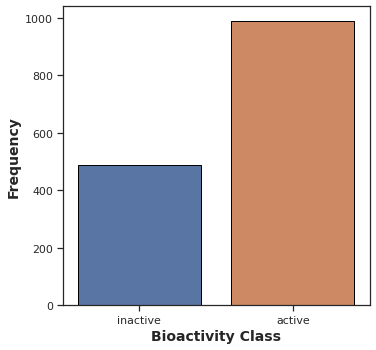

In [42]:
plt.figure(figsize=(5.5,5.5))

sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')
plt.xlabel('Bioactivity Class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')


/usr/local/lib/python3.8/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.8/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)


ValueError: ignored

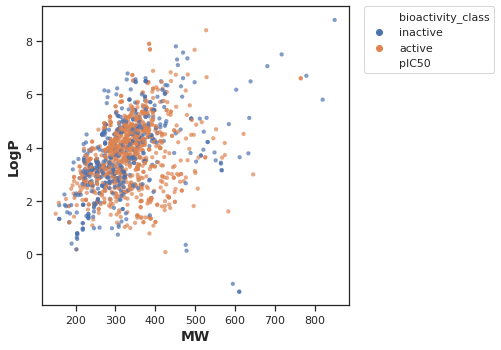

In [43]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

In [ ]:
plt.figure(figsize=(5.5,5.5))
sns.boxplot(x='bioactivity_class',y='pIC50',data=df_2class)
plt.xlabel('Bioactivity Class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 Value', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0)

plt.savefig('plot_ic50.pdf')

In [45]:
def mannwhitney(descriptor, verbose=False):

  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

  seed(1)

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

  stat, p = mannwhitneyu(active, inactive)

  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [46]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,485590.0,8.361199e-216,0.05,Different distribution (reject H0)


In [ ]:
plt.figure(figsize=(5.5,5.5))
sns.boxplot(x='bioactivity_class',y='MW',data=df_2class)
plt.xlabel('Bioactivity Class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0)

plt.savefig('plot_MW.pdf')

In [ ]:
mannwhitney('MW')

In [ ]:
plt.figure(figsize=(5.5,5.5))
sns.boxplot(x='bioactivity_class',y='LogP',data=df_2class)
plt.xlabel('Bioactivity Class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0)

plt.savefig('plot_LogP.pdf')

In [ ]:
mannwhitney('LogP')

In [ ]:
plt.figure(figsize=(5.5,5.5))
sns.boxplot(x='bioactivity_class',y='NumHDonors',data=df_2class)
plt.xlabel('Bioactivity Class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0)

plt.savefig('plot_NumHDonors.pdf')

In [ ]:
mannwhitney('NumHDonors')

In [ ]:
plt.figure(figsize=(5.5,5.5))
sns.boxplot(x='bioactivity_class',y='NumHAcceptors',data=df_2class)
plt.xlabel('Bioactivity Class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0)

plt.savefig('plot_NumHAcceptors.pdf')

In [ ]:
mannwhitney('NumHAcceptors')

In [ ]:
! zip -r results.zip . -i *.csv *.pdf

In [ ]:
!cp results.zip "/content/gdrive/My Drive/BINF_Project/Colab Notebooks/data"

In [ ]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

In [ ]:
! unzip padel.zip

In [ ]:
df_reg=pd.read_csv('bioactivity_data_pIC50_1.csv')
selection = ['canonical_smiles','molecule_chembl_id']
df_reg_selection = df_reg[selection]
df_reg_selection.to_csv('molecule.smi', sep = '\t', index = False, header = False)

In [ ]:
! cat molecule.smi | head -5

! cat molecule.smi | wc -l

In [ ]:
! bash padel.sh

In [ ]:
df_X = pd.read_csv('descriptors_output.csv')
df_X = df_X.drop(columns=['Name'])
df_X

In [ ]:
df_Y = df_reg['pIC50']
df_Y

In [ ]:
dataset = pd.concat([df_X,df_Y], axis=1)
dataset

In [ ]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [ ]:
dataset.replace([np.inf, -np.inf], np.nan, inplace=True)
clean_dataset(dataset)

In [ ]:
dataset.to_csv('bioactivity_data_pIC50.csv')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
X = dataset.drop('pIC50', axis=1)
X

In [ ]:
Y = dataset.pIC50
Y

In [ ]:
X.shape

In [ ]:
from sklearn.feature_selection import VarianceThreshold
selection2 = VarianceThreshold(threshold=(.8*(1-.8)))
X2 = selection2.fit_transform(X)
X2.shape

In [ ]:
X2_train, X2_test, Y_train, Y_test = train_test_split(X2, Y, test_size=0.2)

In [ ]:
X2_train.shape, Y_train.shape

In [ ]:
X2_test.shape, Y_test.shape

In [ ]:
np.random.seed(100)
model = RandomForestRegressor(n_estimators=100)
model.fit(X2_train,Y_train)
r2=model.score(X2_test,Y_test)
r2

In [ ]:
Y_pred = model.predict(X2_test)

In [ ]:
sns.set (color_codes=True)
sns.set_style("white")
ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0,12)
ax.set_ylim(0,12)
ax.figure.set_size_inches(5,5)
plt.show